# Source Code:

In [8]:
import csv
import random
import math

# Load CSV file and convert the data to float, handling non-numeric values
def loadCsv(filename):
    with open(filename, mode='r', encoding='ISO-8859-1', newline='') as file:
        lines = csv.reader(file)
        dataset = list(lines)
    
    # Clean dataset by removing rows with missing or incomplete data
    cleaned_dataset = []
    for row in dataset:
        # Only include rows with the expected number of columns
        if len(row) > 1:  # Update this if your dataset has more than 1 column
            cleaned_row = []
            for x in row:
                if is_float(x):
                    cleaned_row.append(float(x))  # Convert numeric values to float
                else:
                    cleaned_row.append(x)  # Keep non-numeric values as strings
            cleaned_dataset.append(cleaned_row)
    
    return cleaned_dataset

# Helper function to check if a value can be converted to float
def is_float(value):
    try:
        float(value)  # Try converting to float
        return True
    except ValueError:
        return False

# Split dataset into training and test sets
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

# Separate dataset by class
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated

# Calculate mean of a list of numbers
def mean(numbers):
    return sum(numbers) / float(len(numbers))

# Calculate standard deviation of a list of numbers
def stdev(numbers):
    if len(numbers) < 2:
        return 0.0  # Return 0 if there is only one or no data points (no variation)
    avg = mean(numbers)
    variance = sum([pow(x - avg, 2) for x in numbers]) / float(len(numbers) - 1)
    return math.sqrt(variance)

# Summarize dataset (mean and stdev for each attribute)
def summarize(dataset):
    # Remove non-numeric columns (class label) before calculating stats
    numeric_data = [list(filter(lambda x: isinstance(x, (int, float)), row)) for row in dataset]
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*numeric_data)]
    return summaries

# Summarize dataset by class
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

# Calculate the probability of a given value
def calculateProbability(x, mean, stdev):
    if stdev == 0:
        return 1.0  # If stdev is zero, return probability of 1 (no variation)
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

# Calculate class probabilities for a given input
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

# Predict the class for a given input vector
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

# Get predictions for all test data
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

# Calculate the accuracy of the model
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct / float(len(testSet))) * 100.0

# Main function to run the model
def main():
    filename = 'Play_tennis.csv'  # Update with your dataset filename
    splitRatio = 0.67  # Train-test split ratio
    dataset = loadCsv(filename)  # Load dataset
    trainingSet, testSet = splitDataset(dataset, splitRatio)  # Split dataset
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset), len(trainingSet), len(testSet)))
    
    # Prepare the model
    summaries = summarizeByClass(trainingSet)
    
    # Test the model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))

# Run the main function
main()

Split 15 rows into train=10 and test=5 rows
Accuracy: 40.0%


Split 9 rows into train=6 and test=3 rows


C:\Users\Admin\AppData\Local\Temp\ipykernel_15964\2503809886.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_labels, palette='coolwarm')


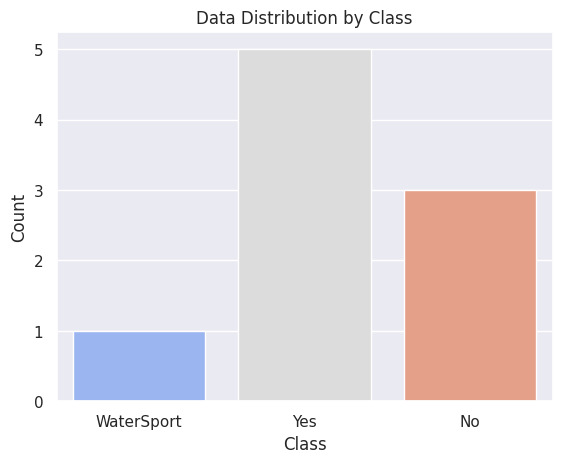

Accuracy: 66.66666666666666%


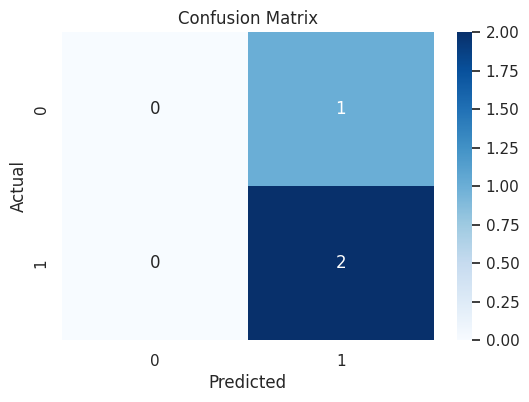

In [6]:
import csv
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def loadCsv(filename):
    with open(filename, mode='r', encoding='ISO-8859-1', newline='') as file:
        lines = csv.reader(file)
        dataset = list(lines)
    cleaned_dataset = []
    for row in dataset:
        if len(row) > 1:
            cleaned_row = []
            for x in row:
                cleaned_row.append(float(x) if is_float(x) else x)
            cleaned_dataset.append(cleaned_row)
    return cleaned_dataset

def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

def separateByClass(dataset):
    separated = {}
    for vector in dataset:
        class_value = vector[-1]
        if class_value not in separated:
            separated[class_value] = []
        separated[class_value].append(vector)
    return separated

def mean(numbers):
    return sum(numbers) / float(len(numbers))

def stdev(numbers):
    if len(numbers) < 2:
        return 0.0
    avg = mean(numbers)
    variance = sum([(x - avg) ** 2 for x in numbers]) / (len(numbers) - 1)
    return math.sqrt(variance)

def summarize(dataset):
    numeric_data = [list(filter(lambda x: isinstance(x, (int, float)), row)) for row in dataset]
    return [(mean(attribute), stdev(attribute)) for attribute in zip(*numeric_data)]

def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    return {classValue: summarize(instances) for classValue, instances in separated.items()}

def calculateProbability(x, mean, stdev):
    if stdev == 0:
        return 1.0
    exponent = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev, 2))))
    return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities

def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    return max(probabilities, key=probabilities.get)

def getPredictions(summaries, testSet):
    return [predict(summaries, testSet[i]) for i in range(len(testSet))]

def getAccuracy(testSet, predictions):
    correct = sum(1 for i in range(len(testSet)) if testSet[i][-1] == predictions[i])
    return (correct / float(len(testSet))) * 100.0

def plotDataDistribution(dataset):
    class_labels = [row[-1] for row in dataset]
    sns.countplot(x=class_labels, palette='coolwarm')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Data Distribution by Class')
    plt.show()

def plotConfusionMatrix(testSet, predictions):
    y_true = [row[-1] for row in testSet]
    cm = confusion_matrix(y_true, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

def main():
    filename = 'sample.csv'
    splitRatio = 0.67
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print(f'Split {len(dataset)} rows into train={len(trainingSet)} and test={len(testSet)} rows')
    plotDataDistribution(dataset)
    summaries = summarizeByClass(trainingSet)
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print(f'Accuracy: {accuracy}%')
    plotConfusionMatrix(testSet, predictions)

main()

In [ ]:
$$
()